In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("Variables_entrevista.csv")

principal_color = '#4866F7'
complementary_color = '#4BBBFA'

In [6]:
df.sample(10)


,ID_Credito,Modelo,Monto_prestamo,EntidadFederativa,ActividadEconomica,FLG_Empleo,IngresoMensual,Propiedad_Casa,Default_Crediticio
12172,2423043,URVAN,468396.0,ESTADO DE MEXICO,TAXISTA,0,3500.0,PROPIETARIO,0
11393,2331007,VERSA,246600.0,CIUDAD DE MEXICO,EMPLEADO PRIVADO,0,21000.0,PROPIETARIO,0
6177,2415095,SENTRA,310000.0,CIUDAD DE MEXICO,TAXISTA,0,30000.0,PROPIETARIO,0
11808,2387092,URVAN,456000.0,ESTADO DE MEXICO,TAXISTA,0,4000.0,PROPIETARIO,0
668,2373002,SENTRA,293200.0,JALISCO,EMPLEADO PRIVADO,0,2800.0,RENTADA,1
8586,2395093,MARCH,189702.0,VERACRUZ,TAXISTA,0,18000.0,PROPIETARIO,0
9821,2369118,MARCH,251801.0,MORELOS,TAXISTA,0,25000.0,PROPIETARIO,0
13888,2376003,VERSA,223100.0,QUERETARO,ECONOMIA INFORMAL,0,26000.0,PROPIETARIO,0
3972,2421059,MARCH,177100.0,SINALOA,EMPLEADO PRIVADO,0,50000.0,PROPIETARIO,0
1900,2310026,VERSA,209301.0,MICHOACAN,EMPLEADO PRIVADO,0,0.0,FAMILIA O PADRES,0


In [7]:
df.dtypes

ID_Credito              int64
Modelo                 object
Monto_prestamo        float64
EntidadFederativa      object
ActividadEconomica     object
FLG_Empleo              int64
IngresoMensual        float64
Propiedad_Casa         object
Default_Crediticio      int64
dtype: object

### Medidas de tendencia central y dispersión 

In [8]:
df.describe()

,ID_Credito,Monto_prestamo,FLG_Empleo,IngresoMensual,Default_Crediticio
count,1.396000e+04,13960.000000,13960.000000,1.396000e+04,13960.000000
mean,2.753327e+06,253532.083295,0.000072,2.501755e+04,0.142120
std,1.468176e+06,72460.789827,0.008464,3.593882e+05,0.349186
min,2.137108e+06,140401.000000,0.000000,0.000000e+00,0.000000
25%,2.345036e+06,211400.000000,0.000000,5.000000e+03,0.000000
50%,2.378020e+06,229801.000000,0.000000,2.000000e+04,0.000000
75%,2.410112e+06,273200.000000,0.000000,2.500000e+04,0.000000
max,9.042001e+06,585576.000000,1.000000,3.602400e+07,1.000000


Tendencia central Media: 253532.08329512895, Mediana: 229801.0,  Moda: 0    211902.0
Name: Monto_prestamo, dtype: float64
Dispersión Range: 445175.0, Varianza: 5250189947.308609, Desviación: 72458.19448004905


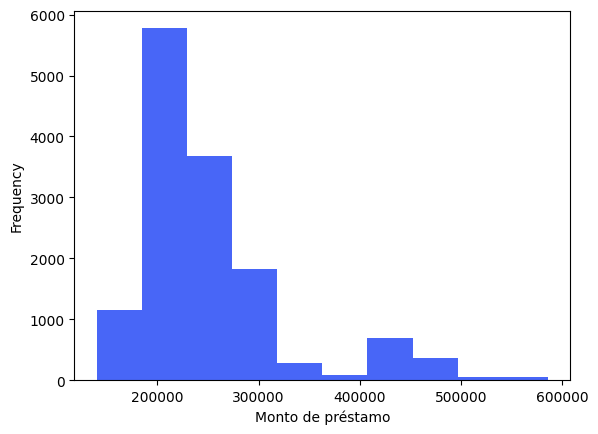

In [12]:
import math


range_ = np.max(df.Monto_prestamo) - np.min(df.Monto_prestamo)
mean = df.Monto_prestamo.mean()
median = df.Monto_prestamo.median()
mode = df.Monto_prestamo.mode()
var = np.var(df.Monto_prestamo)

Desviacion_estandar = np.std(df.Monto_prestamo)

print(f'Tendencia central Media: {mean}, Mediana: {median},  Moda: {mode}')
print(f'Dispersión Range: {range_}, Varianza: {var}, Desviación: {Desviacion_estandar}')

df['Monto_prestamo'].plot.hist(color=principal_color)
plt.xlabel("Monto de préstamo")

plt.show()

### Correlación

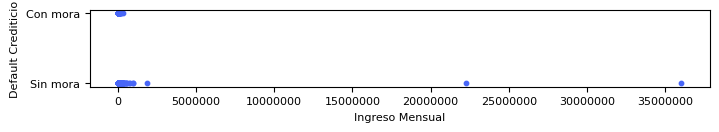

In [ ]:
df.plot.scatter(x='IngresoMensual', y='Default_Crediticio', color=principal_color, s=10, figsize=(8, 1))
plt.xlabel("Ingreso Mensual")
plt.ylabel("Default Crediticio")
plt.ticklabel_format(style='plain', useOffset=False)

# Establecer las ubicaciones y etiquetas del eje y
plt.yticks([0, 1], ['Sin mora', 'Con mora'])

plt.show()

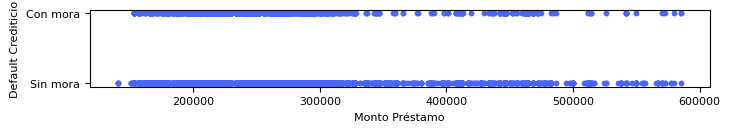

In [ ]:
df.plot.scatter(x='Monto_prestamo', y='Default_Crediticio', color=principal_color, s=10, figsize=(8, 1))
plt.xlabel("Monto Préstamo")
plt.ylabel("Default Crediticio")
plt.ticklabel_format(style='plain', useOffset=False)

# Establecer las ubicaciones y etiquetas del eje y
plt.yticks([0, 1], ['Sin mora', 'Con mora'])

plt.show()

Text(0, 0.5, 'Monto prestamo')

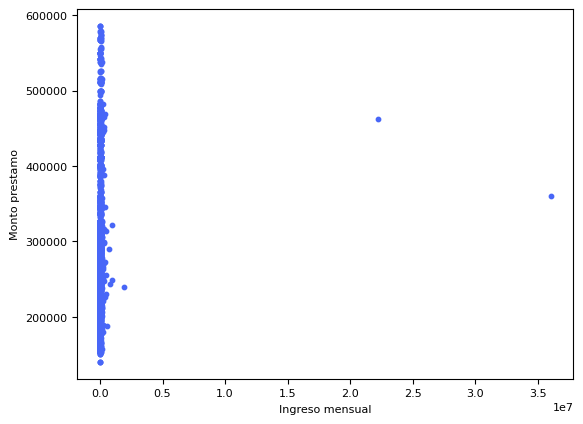

In [ ]:
df.plot.scatter(y='Monto_prestamo', x='IngresoMensual', s=10, c=principal_color)
plt.xlabel("Ingreso mensual")
plt.ylabel("Monto prestamo")

Msatriz de correlaciones 


### Creación de gráfica de pastel para Actividad Económica 

In [ ]:
serie_actividad_economica = df.ActividadEconomica.value_counts()
dataframe_AE = pd.DataFrame(list(serie_actividad_economica.items()), columns=['ActividadEconómica', 'Cantidad'])
# print(dataframe_AE)

# Normalizar los datos
dataframe_AE['norma'] = dataframe_AE['Cantidad']/dataframe_AE['Cantidad'].max()
# print(dataframe_AE['norma'])

value = 0.055
# datos menores a 0.05 pertenecerán a una única rebanada
if (dataframe_AE['norma'] <= value).any() == True:
    minors = dataframe_AE[dataframe_AE['norma'] <= value].sum()['Cantidad']
    count = len(dataframe_AE[dataframe_AE['norma'] <= value])

    # ordenamiento del DF del menor al mayor
    dataframe_AE = dataframe_AE.sort_values(by=['Cantidad'])

    # selección valores más grandes
    m = len(dataframe_AE['Cantidad']) - count
    mayors = dataframe_AE['Cantidad'].tail(m) 
    # print(type(mayors))

    # etiquetas
    labels = []
    labels.extend(dataframe_AE['ActividadEconómica'].tail(m).tolist())

    # extracción de actividades económicas con menor cantidad de datos
    names = dataframe_AE['ActividadEconómica'].head(count) # Indexar núm. de valores que cumplieron la condición  
    names = ', '.join(v for v in names) 
    labels.append(names)

    y = mayors.to_numpy()
    y = np.append(y, minors)

    # arreglo sin conocer las posiciones
    explodea = np.zeros(len(y))
    explodea[np.argmin(y)] = 0.5
    explodea[np.argmax(y)] = 0.2
    

else:
    y = df['Cantidad'].to_numpy()
    etiquetas = df [ 'ActividadEconómica'].tolist()
    explodea = np.zeros(len(y))
    explodea [np.argmin(y)] = 0.4
    explodea [np.argmax(y)] = 0.2

['OTROS', 'EMPLEADO DE GOBIERNO', 'ECONOMIA INFORMAL', 'NEGOCIO PROPIO', 'EMPLEADO PRIVADO', 'TAXISTA', 'SIN DATO, ESTUDIANTE, AMA DE CASA, JUBILADO(A)']


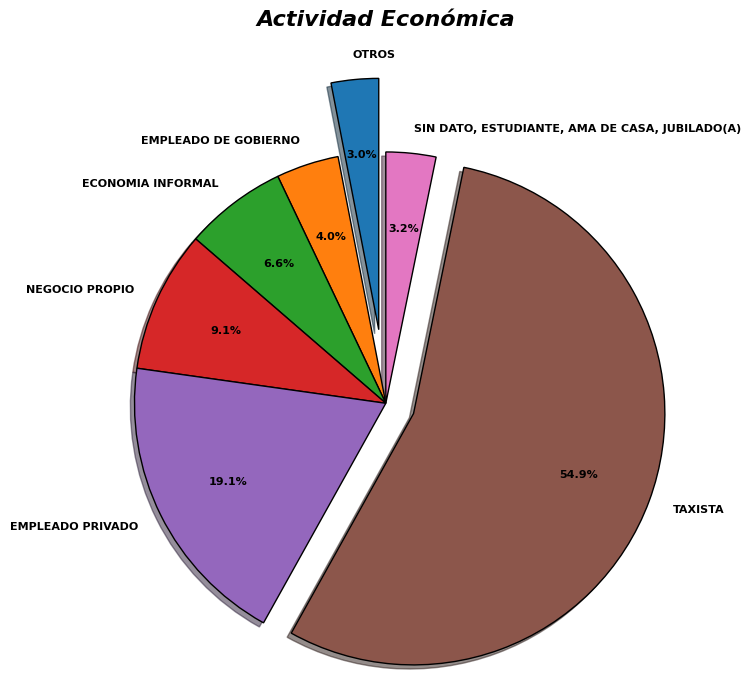

In [ ]:
plt.pie(y, labels=labels, autopct='%1.1f%%', shadow=True,
                                         startangle=90, radius=1.7,explode=explodea,
                                         center=(0.5, 0.5),
                                         pctdistance=0.7, textprops={'color': 'black', 'fontweight': 'bold'},
                                         wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'})


# Evitar que las etiquetas se superpongan
# plt.tight_layout()
plt.title(label="Actividad Económica",
          loc="center",
          fontstyle='italic',fontsize=16,
          fontweight='bold', y=1.5)

plt.show()

### Creación de gráfica de pastel para Propiedad Casa

In [ ]:
serie_Entidad_Federativa = df.Propiedad_Casa.value_counts()
dataframe_FE = pd.DataFrame(list(serie_Entidad_Federativa.items()), columns=['Propiedad_Casa', 'Cantidad'])
# print(dataframe_FE)

# Normalizar los datos
dataframe_FE['norma'] = dataframe_FE['Cantidad']/dataframe_FE['Cantidad'].max()
print(dataframe_FE['norma'])

value = 0.07
# datos menores a 0.05 pertenecerán a una única rebanada
if (dataframe_FE['norma'] <= value).any() == True:
    minors = dataframe_FE[dataframe_FE['norma'] <= value].sum()['Cantidad']
    count = len(dataframe_FE[dataframe_FE['norma'] <= value])

    # ordenamiento del DF del menor al mayor
    dataframe_FE = dataframe_FE.sort_values(by=['Cantidad'])

    # selección valores más grandes
    m = len(dataframe_FE['Cantidad']) - count
    mayors = dataframe_FE['Cantidad'].tail(m) 
    # print(type(mayors))

    # etiquetas
    labels = []
    labels.extend(dataframe_FE['Propiedad_Casa'].tail(m).tolist())

    # extracción de actividades económicas con menor cantidad de datos
    names = dataframe_FE['Propiedad_Casa'].head(count) # Indexar núm. de valores que cumplieron la condición  
    names = '\n'.join(v for v in names) 
    labels.append(names)

    y = mayors.to_numpy()
    y = np.append(y, minors)

    # arreglo sin conocer las posiciones
    explodea = np.zeros(len(y))
    explodea[np.argmin(y)] = 0.5
    explodea[np.argmax(y)] = 0.2
    

else:
    y = df['Cantidad'].to_numpy()
    etiquetas = df [ 'Propiedad_Casa'].tolist()
    explodea = np.zeros(len(y))
    explodea [np.argmin(y)] = 0.5
    explodea [np.argmax(y)] = 0.2

0    1.000000
1    0.264887
2    0.076379
3    0.044214
Name: norma, dtype: float64


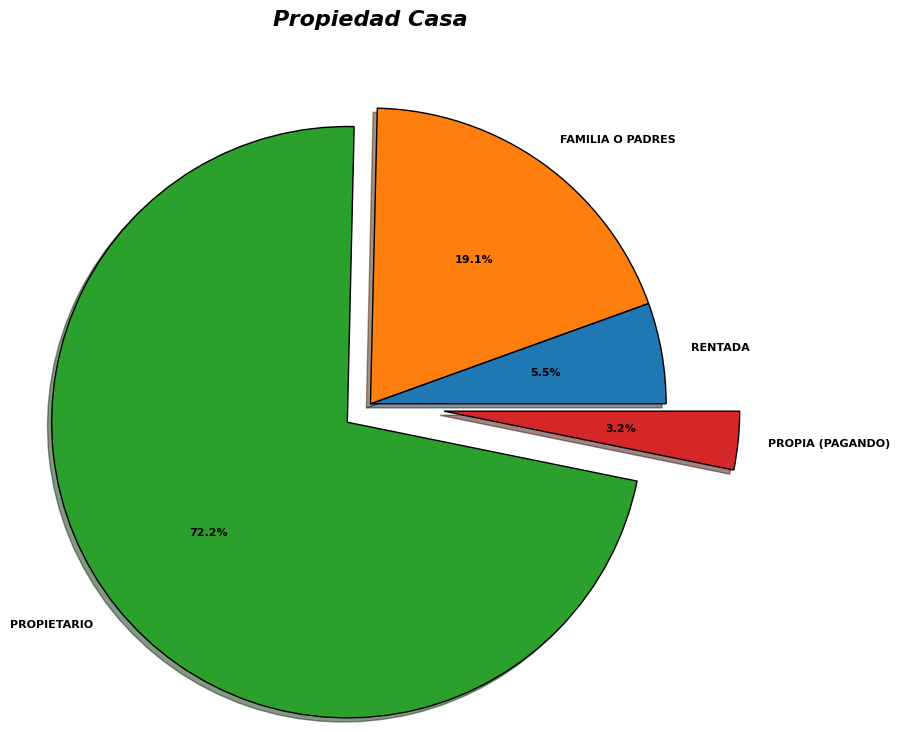

In [ ]:
plt.pie(y, labels=labels, autopct='%1.1f%%', shadow=True,
                                         startangle=0, radius=2,explode=explodea,
                                         center=(0.5, 0.5),
                                         pctdistance=0.6, textprops={'color': 'black', 'fontweight': 'bold'},
                                         wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'})


# Evitar que las etiquetas se superpongan
# plt.tight_layout()
plt.title(label="Propiedad Casa",
          loc="center",
          fontstyle='italic',fontsize=16,
          fontweight='bold', y=1.5)

plt.show()

### Histograma del monto de préstamos

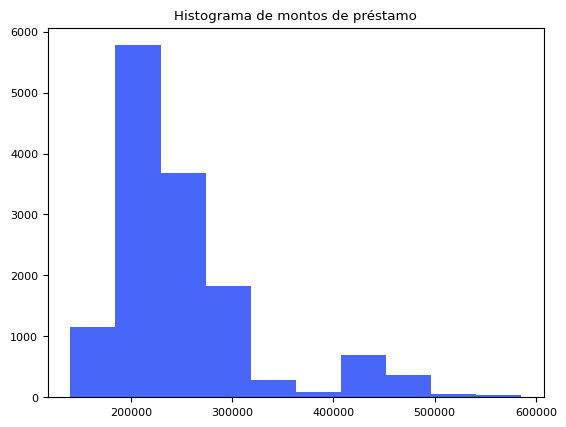

count     13960.000000
mean     253532.083295
std       72460.789827
min      140401.000000
25%      211400.000000
50%      229801.000000
75%      273200.000000
max      585576.000000
Name: Monto_prestamo, dtype: float64


In [ ]:
# Histograma
plt.hist(df["Monto_prestamo"], color=principal_color)
plt.title("Histograma de montos de préstamo")
plt.show()

# Estadísticas descriptivas
print(df["Monto_prestamo"].describe())